##  Exploratory Data Analysis for Machine Learning

## Data Exploration


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Mute the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./insurance.csv', sep=',')
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# No null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
le = preprocessing.LabelEncoder()

ordinal_variables = ['sex', 'smoker','region']

In [9]:
for column in ordinal_variables:
    data[column] = le.fit_transform(data[column])
    print(list(le.classes_))

['female', 'male']
['no', 'yes']
['northeast', 'northwest', 'southeast', 'southwest']


<AxesSubplot:>

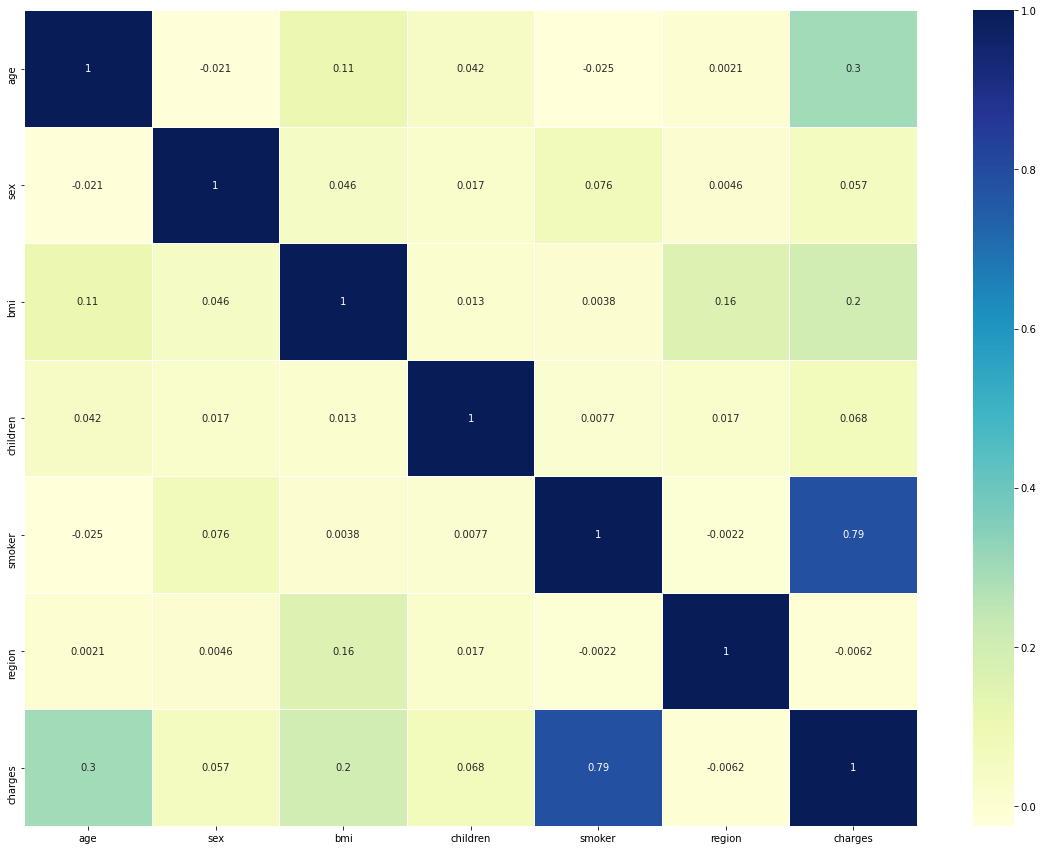

In [10]:
corr = data.corr(method='pearson')
fig = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5)

There is an high correlation between smoking and charging

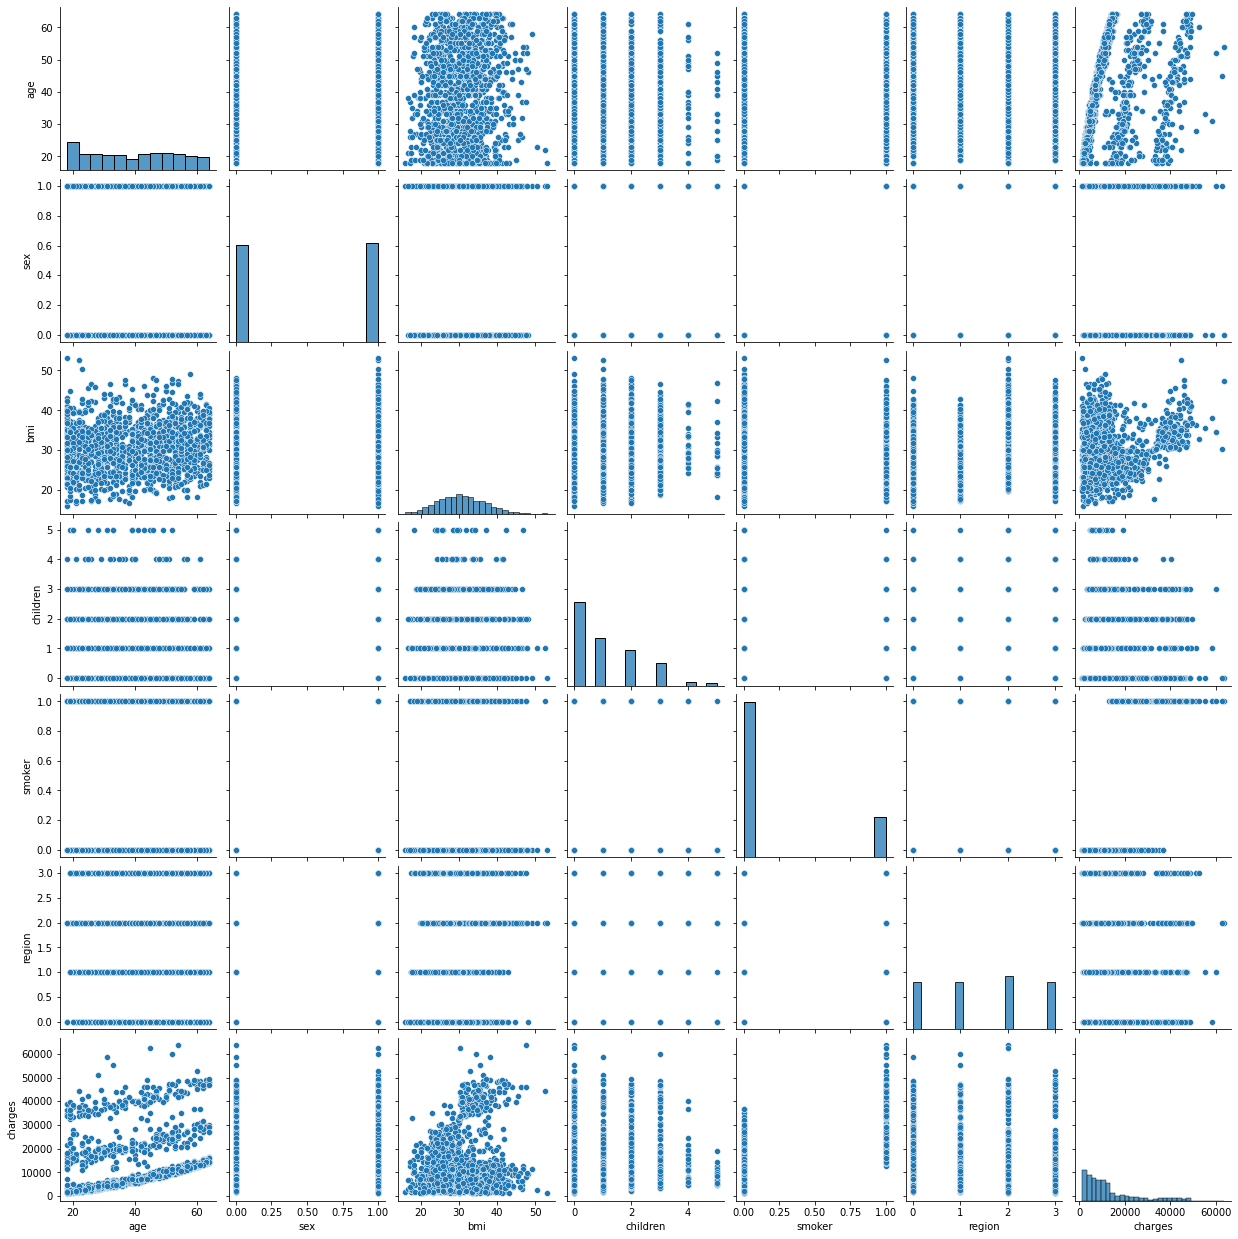

In [11]:
sns.pairplot(data)

Let's try to split charges into several bins

<AxesSubplot:>

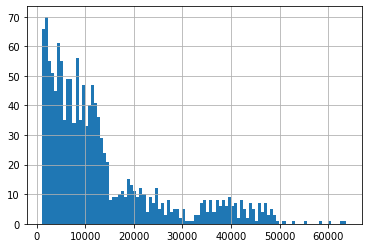

In [12]:
data['charges'].hist(bins = 100)

I decide to cut the histogram in 3 bins

In [13]:
asd = pd.cut( x = data['charges'], bins=[0,15000,32000,100000], labels = [0,1,2])

In [14]:
asd.unique()

[1, 0, 2]
Categories (3, int64): [0 < 1 < 2]

<AxesSubplot:>

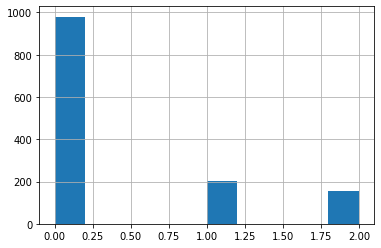

In [15]:
asd.hist(bins = 10)

In [22]:
asd.unique()

array([1, 0, 2], dtype=int64)

In [23]:
data["charges"] = asd

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   int64  
dtypes: float64(1), int32(3), int64(3)
memory usage: 57.6 KB


<AxesSubplot:>

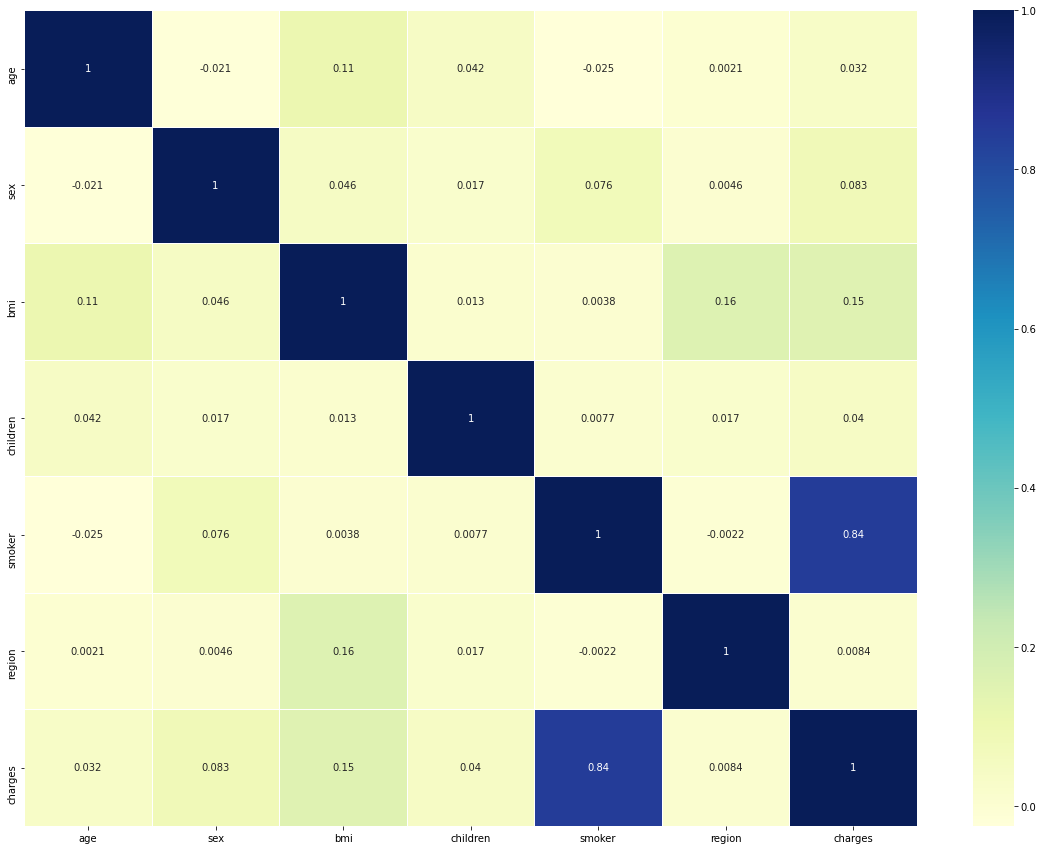

In [25]:
corr = data.corr(method='pearson')
fig = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5)

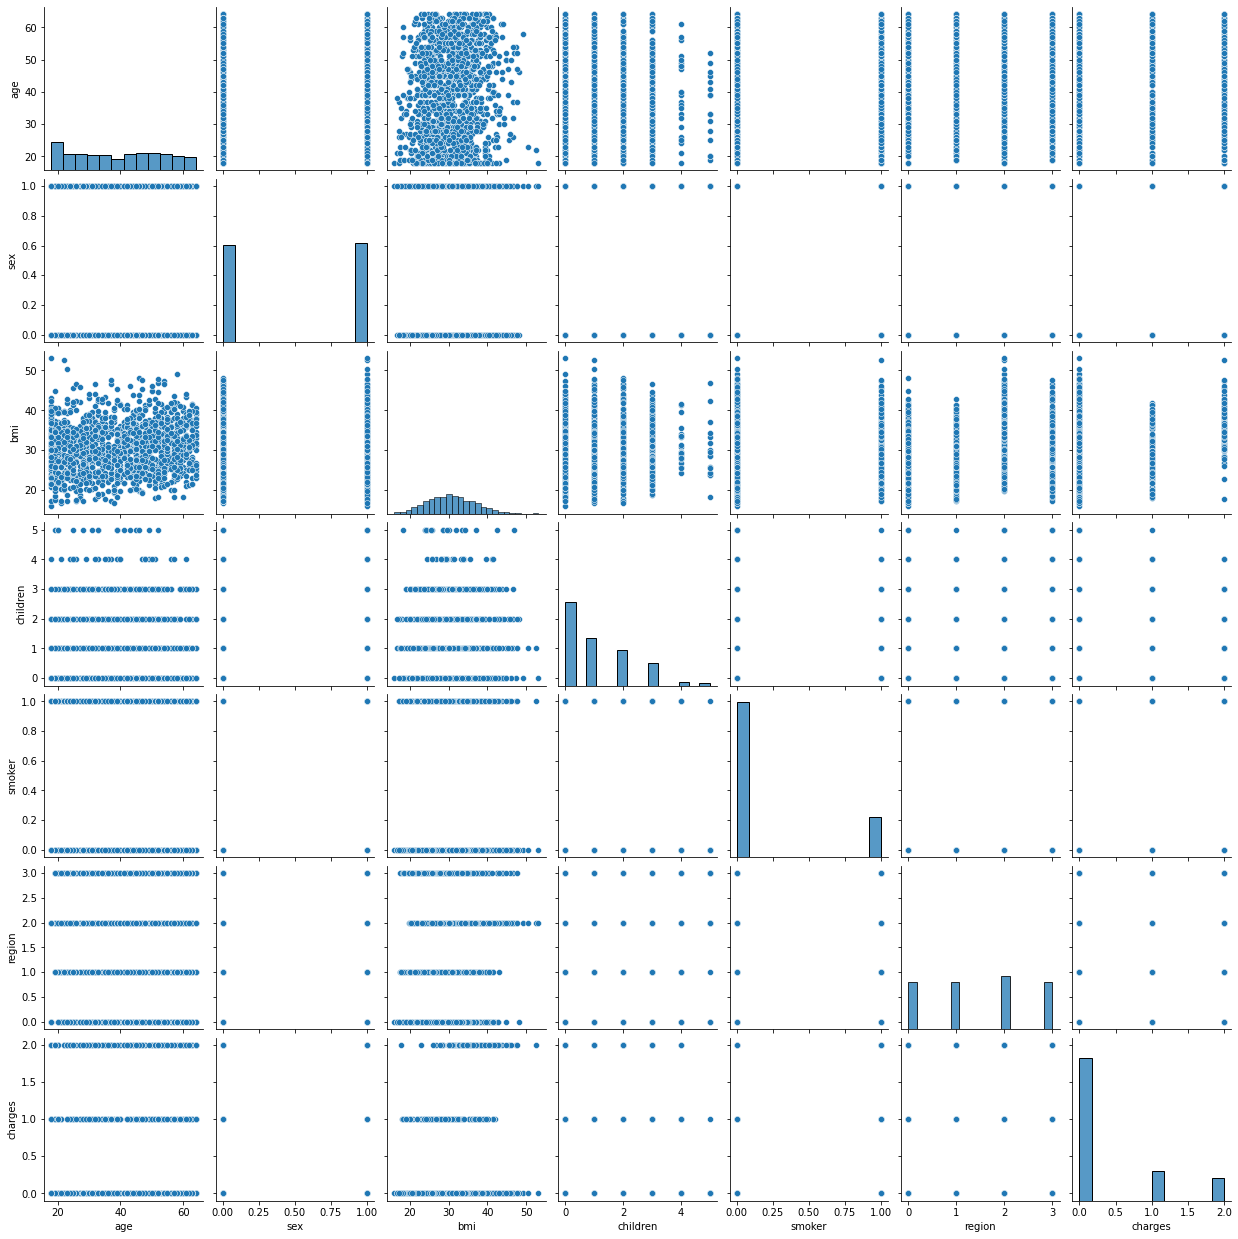

In [26]:
sns.pairplot(data)

We can see an higher correlation between smoking and charging